2024-03-03 09:20:42.144200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 09:20:42.144314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 09:20:42.306394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.8403 - loss: 0.5000 - val_accuracy: 0.9783 - val_loss: 0.0666
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9693 - loss: 0.0988 - val_accuracy: 0.9838 - val_loss: 0.0502
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9811 - loss: 0.0623 - val_accuracy: 0.9864 - val_loss: 0.0415
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9829 - loss: 0.0575 - val_accuracy: 0.9886 - val_loss: 0.0397
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9872 - loss: 0.0393 - val_accuracy: 0.9910 - val_loss: 0.0347
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9907 - val_loss: 0.0354
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9896 -

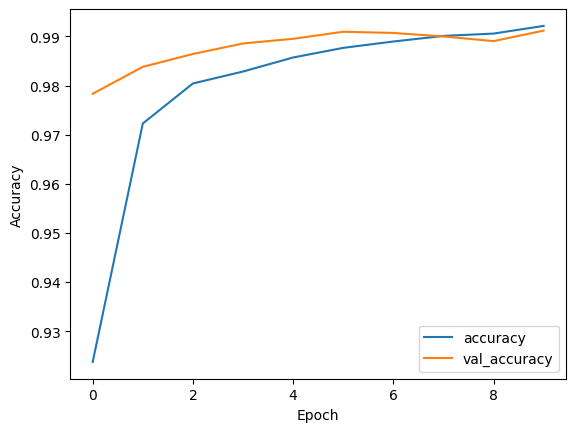

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9891 - loss: 0.0412
Validation accuracy: 0.991190493106842


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataset
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Prepare data
X_train = train.drop(labels=['label'], axis=1)
y_train = train['label']

# Normalize pixel values
X_train = X_train / 255.0
test = test / 255.0

# Reshape data
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Model Architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy}')

# Make predictions on test data
predictions = model.predict_classes(test)


In [2]:
# Make predictions on test data
predictions = np.argmax(model.predict(test), axis=-1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [3]:
predictions

array([2, 0, 9, ..., 3, 9, 2])